In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the images to the range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the images from 28x28 to 784-dimensional vectors
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),  # Hidden layer with 128 neurons
    keras.layers.Dropout(0.2),  # Dropout to prevent overfitting
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (0-9 classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8583 - loss: 0.4805 - val_accuracy: 0.9585 - val_loss: 0.1422
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9546 - loss: 0.1526 - val_accuracy: 0.9710 - val_loss: 0.0951
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9672 - loss: 0.1079 - val_accuracy: 0.9739 - val_loss: 0.0859
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9720 - loss: 0.0887 - val_accuracy: 0.9747 - val_loss: 0.0832
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9766 - loss: 0.0745 - val_accuracy: 0.9759 - val_loss: 0.0751
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9805 - loss: 0.0619 - val_accuracy: 0.9792 - val_loss: 0.0690
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9820 - loss: 0.0564 - val_accuracy: 0.9782 - val_loss: 0.0683
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9836 - loss: 0.050

In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9786 - loss: 0.0710
Test Accuracy: 0.9786


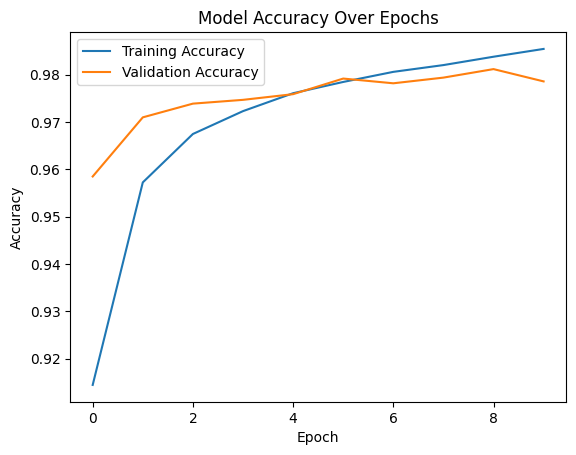

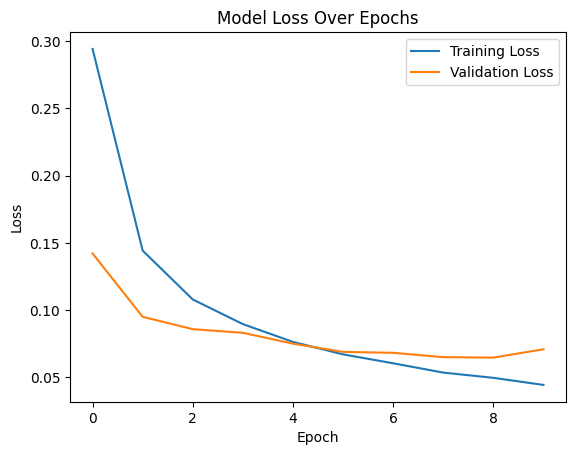

In [6]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Over Epochs')
plt.show()